In [13]:
import common_functions as cf

# cf.download_data('BTC-USD', '1y', '1h')
trading_data = cf.read_data('BTC-USD', '1y', '1h')
trading_data

Datetime          Open          High           Low  \
0    2023-04-26 22:00:00+00:00  28686.220703  28686.220703  28229.384766   
1    2023-04-26 23:00:00+00:00  28305.537109  28450.632812  28290.832031   
2    2023-04-27 00:00:00+00:00  28428.464844  29452.402344  28402.886719   
3    2023-04-27 01:00:00+00:00  29268.369141  29326.994141  28584.007812   
4    2023-04-27 02:00:00+00:00  28744.066406  29069.574219  28744.066406   
...                        ...           ...           ...           ...   
8750 2024-04-26 18:00:00+00:00  63977.789062  64114.113281  63942.917969   
8751 2024-04-26 19:00:00+00:00  64041.187500  64097.558594  63799.289062   
8752 2024-04-26 20:00:00+00:00  63803.207031  64070.699219  63803.207031   
8753 2024-04-26 21:00:00+00:00  63944.292969  64051.371094  63830.152344   
8754 2024-04-26 22:00:00+00:00  64047.824219  64047.824219  63777.523438   

             Close      Volume  
0     28307.880859           0  
1     28417.242188           0  
2     29294.464844  1673949184  
3     28735.347656   764401664  
4     29054.978516   590315520  
...            ...         ...  
8750  64038.597656           0  
8751  63877.546875           0  
8752  63900.398438           0  
8753  64051.371094     4069376  
8754  63847.597656    57040896  

[8755 rows x 6 columns]

In [14]:
import pandas_ta as ta
import pandas as pd

cf.set_indicators(trading_data, 200)

trading_data.index = pd.to_datetime(trading_data.index)

trading_data['RSI']=ta.rsi(trading_data.Close, length=16)
my_bbands = ta.bbands(trading_data.Close, length=14, std=2.0)
trading_data=trading_data.join(my_bbands)

trading_data.reset_index(inplace=True)

trading_data

index                  Datetime          Open  \
0    1970-01-01 00:00:00.000000000 2023-04-26 22:00:00+00:00  28686.220703   
1    1970-01-01 00:00:00.000000001 2023-04-26 23:00:00+00:00  28305.537109   
2    1970-01-01 00:00:00.000000002 2023-04-27 00:00:00+00:00  28428.464844   
3    1970-01-01 00:00:00.000000003 2023-04-27 01:00:00+00:00  29268.369141   
4    1970-01-01 00:00:00.000000004 2023-04-27 02:00:00+00:00  28744.066406   
...                            ...                       ...           ...   
8750 1970-01-01 00:00:00.000008750 2024-04-26 18:00:00+00:00  63977.789062   
8751 1970-01-01 00:00:00.000008751 2024-04-26 19:00:00+00:00  64041.187500   
8752 1970-01-01 00:00:00.000008752 2024-04-26 20:00:00+00:00  63803.207031   
8753 1970-01-01 00:00:00.000008753 2024-04-26 21:00:00+00:00  63944.292969   
8754 1970-01-01 00:00:00.000008754 2024-04-26 22:00:00+00:00  64047.824219   

              High           Low         Close      Volume           EMA  \
0     28686.220703  28229.384766  28307.880859           0           NaN   
1     28450.632812  28290.832031  28417.242188           0           NaN   
2     29452.402344  28402.886719  29294.464844  1673949184           NaN   
3     29326.994141  28584.007812  28735.347656   764401664           NaN   
4     29069.574219  28744.066406  29054.978516   590315520           NaN   
...            ...           ...           ...         ...           ...   
8750  64114.113281  63942.917969  64038.597656           0  64942.321986   
8751  64097.558594  63799.289062  63877.546875           0  64931.727208   
8752  64070.699219  63803.207031  63900.398438           0  64921.465231   
8753  64051.371094  63830.152344  64051.371094     4069376  64912.807577   
8754  64047.824219  63777.523438  63847.597656    57040896  64902.208474   

            MACD  MACD_signal  ...        RSI        ADX    ADX_pos  \
0            NaN          NaN  ...        NaN        NaN        NaN   
1            NaN          NaN  ...        NaN        NaN        NaN   
2            NaN          NaN  ...        NaN        NaN        NaN   
3            NaN          NaN  ...        NaN        NaN        NaN   
4            NaN          NaN  ...        NaN        NaN        NaN   
...          ...          ...  ...        ...        ...        ...   
8750 -146.448989  -109.632592  ...  46.833180  16.160382  20.276101   
8751 -149.128321  -117.531738  ...  44.616694  15.736601  19.219114   
8752 -147.705128  -123.566416  ...  45.010582  15.343089  18.297874   
8753 -132.863439  -125.425821  ...  47.635072  14.977686  17.548705   
8754 -135.976652  -127.535987  ...  44.572338  14.805935  16.640433   

        ADX_neg          VWAP    BBL_14_2.0    BBM_14_2.0    BBU_14_2.0  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN  29049.917969           NaN           NaN           NaN   
3           NaN  28997.313687           NaN           NaN           NaN   
4           NaN  28989.301487           NaN           NaN           NaN   
...         ...           ...           ...           ...           ...   
8750  22.247743  44679.953629  63527.456880  64145.964565  64764.472249   
8751  23.598232  44679.953629  63506.374077  64099.063058  64691.752039   
8752  22.467086  44679.953629  63489.896053  64061.732980  64633.569907   
8753  21.547216  44679.990631  63487.797632  64043.748047  64599.698462   
8754  21.426679  44680.506953  63477.475290  64004.267020  64531.058750   

      BBB_14_2.0  BBP_14_2.0  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  
...          ...         ...  
8750    1.928438    0.413205  
8751    1.849291    0.313126  
8752    1.785268    0.358933  
8753    1.736158    0.506856  
8754    1.646114    0.351299  

[8755 rows x 22 columns]

In [18]:
import common_trade_signals as cts

def TotalSignal(l):
    if ((trading_data.Close[l]<=trading_data['BBL_14_2.0'][l])
        and (trading_data.RSI[l]<55)):
            return 1
    if ((trading_data.Close[l]>=trading_data['BBU_14_2.0'][l])
        and (trading_data.RSI[l]>55)):
            return -1
    return 0
# def TotalSignal(l):
#     if ((trading_data.VWAPSignal[l]==1)
#         and (trading_data.Close[l]<=trading_data['BBL_14_2.0'][l])):
#         # and trading_data.RSI[l]<45):
#             return 1
#     if ((trading_data.VWAPSignal[l]==-1)
#         and (trading_data.Close[l]>=trading_data['BBU_14_2.0'][l])):
#         # and trading_data.RSI[l]>55):
#             return -1
#     return 0

TotSignal = [0]*len(trading_data)
for row in range(backcandles, len(trading_data)): #careful backcandles used previous cell
    TotSignal[row] = TotalSignal(row)
trading_data['Total_trade_signal'] = TotSignal

# cf.set_trade_signals(trading_data, cts.total_macd_trade_signal)
print(trading_data[trading_data.Total_trade_signal!=0].count())
trading_data

index                 965
Datetime              965
Open                  965
High                  965
Low                   965
Close                 965
Volume                965
EMA                   940
MACD                  963
MACD_signal           963
MACD_histogram        963
ATR                   965
RSI                   965
ADX                   963
ADX_pos               965
ADX_neg               965
VWAP                  965
BBL_14_2.0            965
BBM_14_2.0            965
BBU_14_2.0            965
BBB_14_2.0            965
BBP_14_2.0            965
VWAPSignal            965
Total_trade_signal    965
dtype: int64


index                  Datetime          Open  \
0    1970-01-01 00:00:00.000000000 2023-04-26 22:00:00+00:00  28686.220703   
1    1970-01-01 00:00:00.000000001 2023-04-26 23:00:00+00:00  28305.537109   
2    1970-01-01 00:00:00.000000002 2023-04-27 00:00:00+00:00  28428.464844   
3    1970-01-01 00:00:00.000000003 2023-04-27 01:00:00+00:00  29268.369141   
4    1970-01-01 00:00:00.000000004 2023-04-27 02:00:00+00:00  28744.066406   
...                            ...                       ...           ...   
8750 1970-01-01 00:00:00.000008750 2024-04-26 18:00:00+00:00  63977.789062   
8751 1970-01-01 00:00:00.000008751 2024-04-26 19:00:00+00:00  64041.187500   
8752 1970-01-01 00:00:00.000008752 2024-04-26 20:00:00+00:00  63803.207031   
8753 1970-01-01 00:00:00.000008753 2024-04-26 21:00:00+00:00  63944.292969   
8754 1970-01-01 00:00:00.000008754 2024-04-26 22:00:00+00:00  64047.824219   

              High           Low         Close      Volume           EMA  \
0     28686.220703  28229.384766  28307.880859           0           NaN   
1     28450.632812  28290.832031  28417.242188           0           NaN   
2     29452.402344  28402.886719  29294.464844  1673949184           NaN   
3     29326.994141  28584.007812  28735.347656   764401664           NaN   
4     29069.574219  28744.066406  29054.978516   590315520           NaN   
...            ...           ...           ...         ...           ...   
8750  64114.113281  63942.917969  64038.597656           0  64942.321986   
8751  64097.558594  63799.289062  63877.546875           0  64931.727208   
8752  64070.699219  63803.207031  63900.398438           0  64921.465231   
8753  64051.371094  63830.152344  64051.371094     4069376  64912.807577   
8754  64047.824219  63777.523438  63847.597656    57040896  64902.208474   

            MACD  MACD_signal  ...    ADX_pos    ADX_neg          VWAP  \
0            NaN          NaN  ...        NaN        NaN           NaN   
1            NaN          NaN  ...        NaN        NaN           NaN   
2            NaN          NaN  ...        NaN        NaN  29049.917969   
3            NaN          NaN  ...        NaN        NaN  28997.313687   
4            NaN          NaN  ...        NaN        NaN  28989.301487   
...          ...          ...  ...        ...        ...           ...   
8750 -146.448989  -109.632592  ...  20.276101  22.247743  44679.953629   
8751 -149.128321  -117.531738  ...  19.219114  23.598232  44679.953629   
8752 -147.705128  -123.566416  ...  18.297874  22.467086  44679.953629   
8753 -132.863439  -125.425821  ...  17.548705  21.547216  44679.990631   
8754 -135.976652  -127.535987  ...  16.640433  21.426679  44680.506953   

        BBL_14_2.0    BBM_14_2.0    BBU_14_2.0  BBB_14_2.0  BBP_14_2.0  \
0              NaN           NaN           NaN         NaN         NaN   
1              NaN           NaN           NaN         NaN         NaN   
2              NaN           NaN           NaN         NaN         NaN   
3              NaN           NaN           NaN         NaN         NaN   
4              NaN           NaN           NaN         NaN         NaN   
...            ...           ...           ...         ...         ...   
8750  63527.456880  64145.964565  64764.472249    1.928438    0.413205   
8751  63506.374077  64099.063058  64691.752039    1.849291    0.313126   
8752  63489.896053  64061.732980  64633.569907    1.785268    0.358933   
8753  63487.797632  64043.748047  64599.698462    1.736158    0.506856   
8754  63477.475290  64004.267020  64531.058750    1.646114    0.351299   

      VWAPSignal  Total_trade_signal  
0              0                   0  
1              0                   0  
2              0                   0  
3              0                   0  
4              0                   0  
...          ...                 ...  
8750           1                   0  
8751           1                   0  
8752           1                   0  
8753       

In [19]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 3
    slcoef = 1.1
    TPSLRatio = 1.5

    def init(self):
        super().init()
        self.signal1 = self.I(lambda: self.data.Total_trade_signal)

    def next(self):
        super().next()
        slatr = self.slcoef * self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

backtest = Backtest(trading_data, MyStrat, cash=20000, margin=1/10, commission=0.00)
stats, heatmap = backtest.optimize(slcoef=[i/10 for i in range(10, 26)],
                                    TPSLRatio=[i/10 for i in range(10, 26)],
                                    maximize='Return [%]', max_tries=300,
                                    random_state=0,
                                    return_heatmap=True)

print(stats)
backtest.plot()
cf.show_heatmap(heatmap)


/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_57544/3889505355.py:28: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  backtest = Backtest(trading_data, MyStrat, cash=20000, margin=1/10, commission=0.00)
/var/folders/rk/xympl3kj42nf5b5zvnt_lrxh0000gn/T/ipykernel_57544/3889505355.py:28: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(trading_data, MyStrat, cash=20000, margin=1/10, commission=0.00)
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                    8754.0
Duration                               8754.0
Exposure Time [%]                   33.181039
Equity Final [$]                 12825.357813
Equity Peak [$]                  25048.790206
Return [%]                         -35.873211
Buy & Hold Return [%]              125.547076
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -48.798494
Avg. Drawdown [%]                   -13.69682
Max. Drawdown Duration                 5540.0
Avg. Drawdown Duration             792.181818
# Trades                                147.0
Win Rate [%]                        33.333333
Best Trade [%]                       4.794531
Worst Trade [%]                     -3.185857
Avg. Trade [%]                    

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


In [8]:
import common_trade_signals as cts

cf.set_trade_signals(trading_data, cts.total_macd_ema_trade_signal)
trading_data

100%|██████████| 8755/8755 [00:00<00:00, 48678.91it/s]

number of trades: 197


Datetime          Open          High           Low  \
0    2023-04-26 22:00:00+00:00  28686.220703  28686.220703  28229.384766   
1    2023-04-26 23:00:00+00:00  28305.537109  28450.632812  28290.832031   
2    2023-04-27 00:00:00+00:00  28428.464844  29452.402344  28402.886719   
3    2023-04-27 01:00:00+00:00  29268.369141  29326.994141  28584.007812   
4    2023-04-27 02:00:00+00:00  28744.066406  29069.574219  28744.066406   
...                        ...           ...           ...           ...   
8750 2024-04-26 18:00:00+00:00  63977.789062  64114.113281  63942.917969   
8751 2024-04-26 19:00:00+00:00  64041.187500  64097.558594  63799.289062   
8752 2024-04-26 20:00:00+00:00  63803.207031  64070.699219  63803.207031   
8753 2024-04-26 21:00:00+00:00  63944.292969  64051.371094  63830.152344   
8754 2024-04-26 22:00:00+00:00  64047.824219  64047.824219  63777.523438   

             Close           EMA        MACD  MACD_signal  MACD_histogram  \
0     28307.880859           NaN         NaN          NaN             NaN   
1     28417.242188           NaN         NaN          NaN             NaN   
2     29294.464844           NaN         NaN          NaN             NaN   
3     28735.347656           NaN         NaN          NaN             NaN   
4     29054.978516           NaN         NaN          NaN             NaN   
...            ...           ...         ...          ...             ...   
8750  64038.597656  64942.321986 -146.448989  -109.632592      -36.816396   
8751  63877.546875  64931.727208 -149.128321  -117.531738      -31.596583   
8752  63900.398438  64921.465231 -147.705128  -123.566416      -24.138712   
8753  64051.371094  64912.807577 -132.863439  -125.425821       -7.437618   
8754  63847.597656  64902.208474 -135.976652  -127.535987       -8.440666   

             ATR        RSI        ADX    ADX_pos    ADX_neg  \
0            NaN        NaN        NaN        NaN        NaN   
1            NaN        NaN        NaN        NaN        NaN   
2            NaN        NaN        NaN        NaN        NaN   
3            NaN        NaN        NaN        NaN        NaN   
4            NaN        NaN        NaN        NaN        NaN   
...          ...        ...        ...        ...        ...   
8750  430.222927  47.084610  16.160382  20.276101  22.247743   
8751  411.372442  44.545456  15.736601  19.219114  23.598232   
8752  390.818120  44.998688  15.343089  18.297874  22.467086   
8753  366.589639  48.021259  14.977686  17.548705  21.547216   
8754  353.340784  44.469075  14.805935  16.640433  21.426679   

      EMA_trade_signal  MACD_trade_signal  RSI_trade_signal  ADX_trade_signal  \
0                    0                  0                 0                 0   
1                    0                  0                 0                 0   
2                    0                  0                 0                 0   
3                    0                  0                 0                 0   
4                    0                  0                 0                 0   
...                ...                ...               ...               ...   
8750                -1                  0                 0                 0   
8751                -1                  0                 0                 0   
8752                -1                  0                 0                 0   
8753                -1                  0                 0                 0   
8754                -1                  0                 0                 0   

      Total_trade_signal  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
8750                   0  
8751                   0  
8752                   0  
8753                   0  
8754                   0  

[8755 rows x 19 columns]

/Users/andrew/github/trading-strategies/ddd-southwest/common_functions.py:199: UserWarning: Some prices are larger than initial cash value. Note that fractional trading is not supported. If you want to trade Bitcoin, increase initial cash, or trade μBTC or satoshis instead (GH-134).
  return backtest, stats, heatmap
/Users/andrew/github/trading-strategies/ddd-southwest/common_functions.py:199: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  return backtest, stats, heatmap
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                    8754.0
Duration                               8754.0
Exposure Time [%]                   48.315248
Equity Final [$]                 70627.632207
Equity Peak [$]                 104649.552307
Return [%]                         182.510529
Buy & Hold Return [%]              125.547076
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -34.996747
Avg. Drawdown [%]                   -3.771702
Max. Drawdown Duration                 1861.0
Avg. Drawdown Duration                98.0875
# Trades                                 97.0
Win Rate [%]                        39.175258
Best Trade [%]                      11.336938
Worst Trade [%]                     -5.224221
Avg. Trade [%]                    

/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  fig = gridplot(


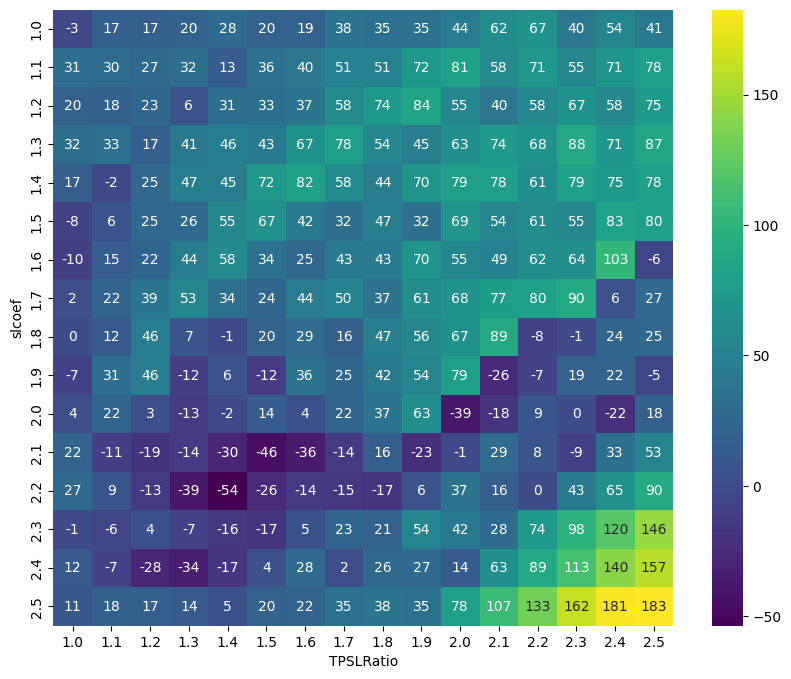

In [9]:
backtest, stats, heatmap = cf.backtest_trading(trading_data, 25000)

print(stats)
backtest.plot()
cf.show_heatmap(heatmap)
